In [3]:
! pip install opencv-python

In [4]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in ./.local/lib/python3.8/site-packages (1.3.1)


# Steps 
## load the dataset

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import random
from sklearn.cluster import KMeans

/home/dosisiddhesh/.local/lib/python3.8/site-packages/scipy/__init__.py:143: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.17.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
dataset_folder = './data'

In [7]:
%matplotlib inline

In [8]:
# Function to count the number of images in each subfolder
def count_images_in_subfolders(folder):
    folder_counts = {}

    # Iterate through subfolders (each subfolder corresponds to a class)
    for class_name in os.listdir(folder):
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            num_images = len([filename for filename in os.listdir(class_folder) if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))])
            folder_counts[class_name] = num_images
    
    return folder_counts

In [9]:
# Count the number of images in each subfolder
image_counts = count_images_in_subfolders(dataset_folder)
# Display the counts
for class_name, count in image_counts.items():
    print(f'Class: {class_name} - Number of Images: {count}')


Class: George_W_Bush - Number of Images: 10
Class: BIM2016002 - Number of Images: 10
Class: Colin_Powell - Number of Images: 10
Class: Hugo_Chavez - Number of Images: 10
Class: Ariel_Sharon - Number of Images: 10
Class: IHM2016005 - Number of Images: 10
Class: Arnold_Schwarzenegger - Number of Images: 10
Class: IIT2016044 - Number of Images: 10
Class: IIT2016135 - Number of Images: 10
Class: ITM2016007 - Number of Images: 10
Class: Gerhard_Schroeder - Number of Images: 10
Class: Jacques_Chirac - Number of Images: 10
Class: Vladimir_Putin - Number of Images: 10
Class: Tony_Blair - Number of Images: 10
Class: Donald_Rumsfeld - Number of Images: 10


In [10]:
def load_images_from_subfolders(folder):
    image_data = []
    class_labels = []

    # Iterate through subfolders (each subfolder corresponds to a class)
    for class_name in os.listdir(folder):
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img = cv2.imread(os.path.join(class_folder, filename))
                if img is not None:
                    # Resize the image to a fixed size (e.g., 100x100)
                    img = cv2.resize(img, (100, 100))
                    image_data.append(img)
                    class_labels.append(class_name)
    
    return image_data, class_labels

In [11]:
# Load images and class labels from the dataset folder
image_data, class_labels = load_images_from_subfolders(dataset_folder)

# Calculate basic statistics
mean_pixel_value = np.mean(image_data)
stddev_pixel_value = np.std(image_data)

In [12]:
print(f'Mean Pixel Value: {mean_pixel_value}')
print(f'Std Dev Pixel Value: {stddev_pixel_value}')

Mean Pixel Value: 108.38993377777778
Std Dev Pixel Value: 74.17521164021828


Text(0, 0.5, 'Frequency')

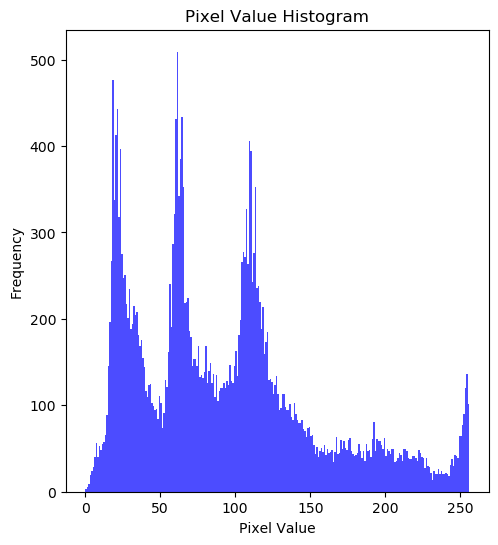

In [13]:
# Plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(image_data[0].ravel(), bins=256, range=(0, 256), color='b', alpha=0.7)
plt.title('Pixel Value Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')


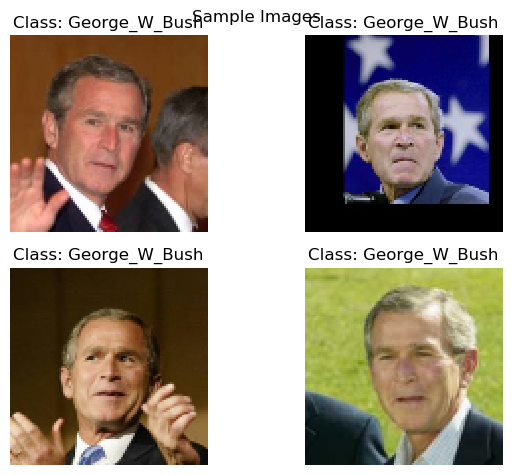

In [14]:
# Display sample images
plt.subplot(1, 2, 2)
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(image_data[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Class: {class_labels[i]}')
    plt.axis('off')
plt.suptitle('Sample Images')
# Show plots
plt.tight_layout()
plt.show()


In [15]:
# write function to check image channels
def check_image_channels(image_data):
    num_channels = []
    for image in image_data:
        num_channels.append(image.shape[2])
    return num_channels


In [27]:
# Check image channels
num_channels = check_image_channels(image_data)
print(f'Number of channels: {num_channels}')

if num_channels[0]==3:
    print('RGB image')


Number of channels: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
RGB image


In [17]:
# Function to count the number of images in each class
def count_images_per_class(folder):
    class_counts = {}
    
    for class_name in os.listdir(folder):
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            num_images = len(os.listdir(class_folder))
            class_counts[class_name] = num_images
    
    return class_counts


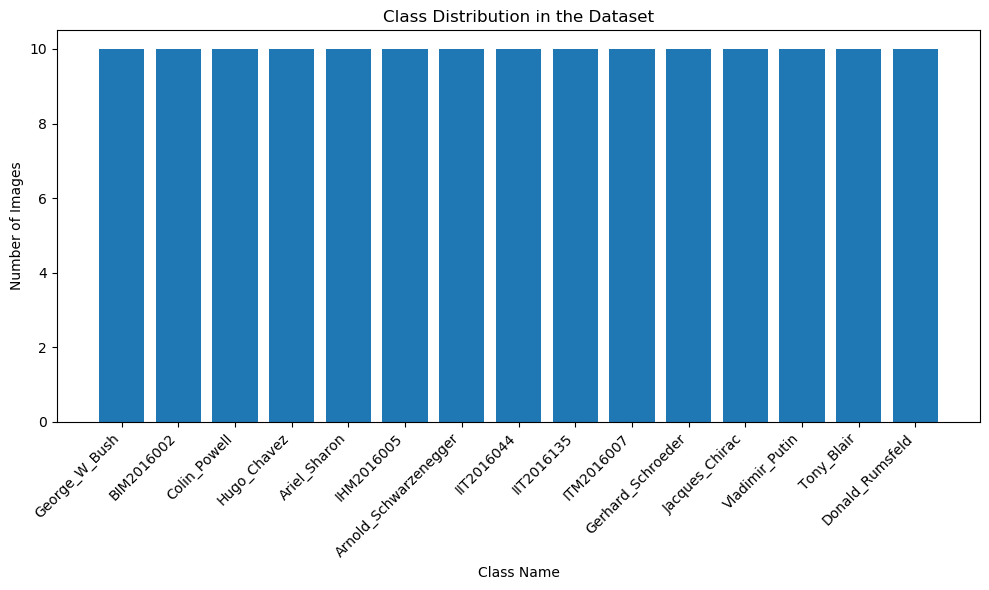

In [18]:


# Get class counts
class_counts = count_images_per_class(dataset_folder)

# Extract class names and counts
class_names = list(class_counts.keys())
class_counts = list(class_counts.values())

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts)
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Class Distribution in the Dataset')

# Rotate the x-axis labels for better readability (if needed)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()




In [19]:
# Function to create a thumbnail grid
def create_thumbnail_grid(images, grid_shape=(3, 3), figsize=(8, 8)):
    fig = plt.figure(figsize=figsize)
    grid = ImageGrid(fig, 111, nrows_ncols=grid_shape, axes_pad=0.1)

    for i in range(grid_shape[0] * grid_shape[1]):
        ax = grid[i]
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        ax.axis('off')
    
    plt.show()



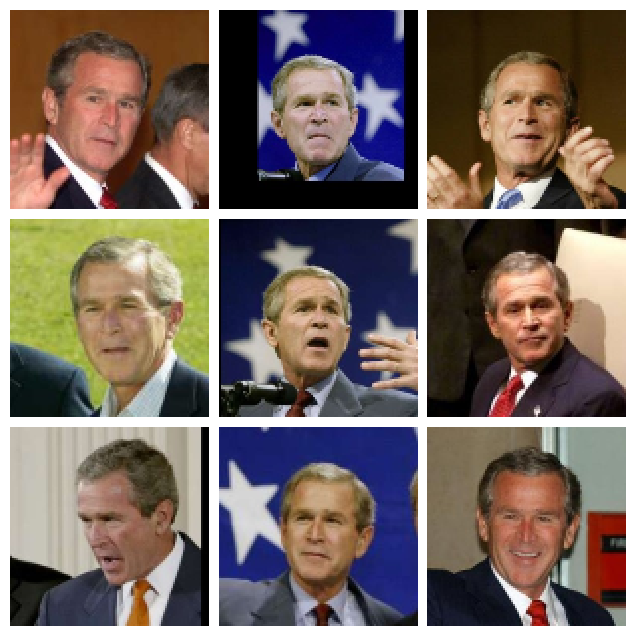

In [20]:
create_thumbnail_grid(image_data[:9])

In [21]:
# Function to perform image augmentation
def augment_images(images, num_samples=9):
    augmented_images = []
    
    for i in range(num_samples):
        img = random.choice(images)
        # Apply random augmentations (e.g., rotation, flip)
        augmented_img = img.copy()
        if random.random() < 0.5:
            augmented_img = cv2.flip(augmented_img, 1)  # Horizontal flip
        if random.random() < 0.5:
            rotation_angle = random.randint(0, 45)
            rotation_matrix = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), rotation_angle, 1)
            augmented_img = cv2.warpAffine(augmented_img, rotation_matrix, (img.shape[1], img.shape[0]))
        
        augmented_images.append(augmented_img)
    
    return augmented_images

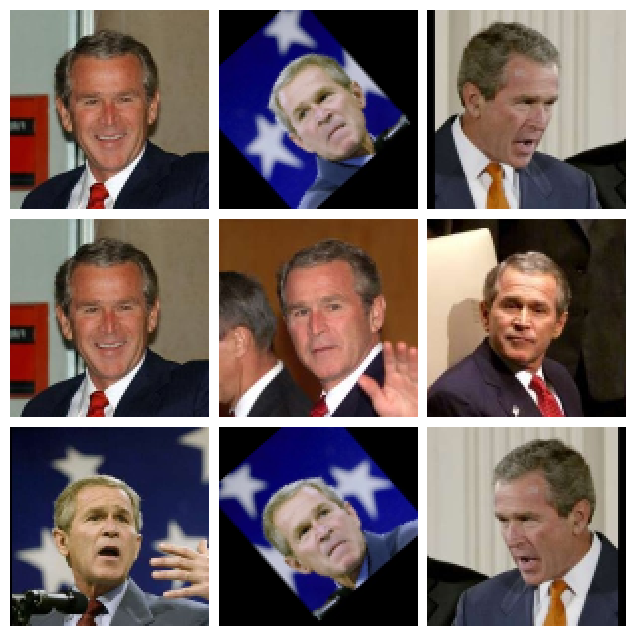

In [22]:

# Augment and display the same images
augmented_images = augment_images(image_data[:9])
create_thumbnail_grid(augmented_images)



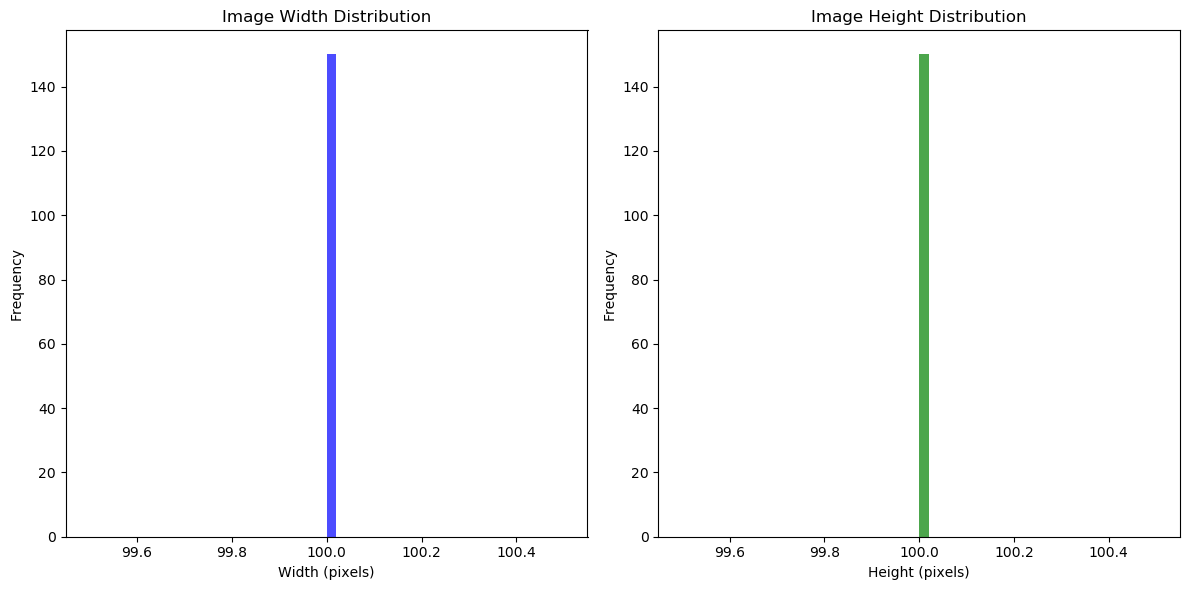

In [23]:
# Function to analyze image dimensions
def analyze_image_dimensions(images):
    widths = []
    heights = []

    for img in images:
        height, width, _ = img.shape
        widths.append(width)
        heights.append(height)
    
    return widths, heights

# Load images from the dataset folder
image_data, class_labels = load_images_from_subfolders(dataset_folder)

# Analyze image dimensions
widths, heights = analyze_image_dimensions(image_data)

# Plot histograms of image dimensions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=50, color='b', alpha=0.7)
plt.title('Image Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=50, color='g', alpha=0.7)
plt.title('Image Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()






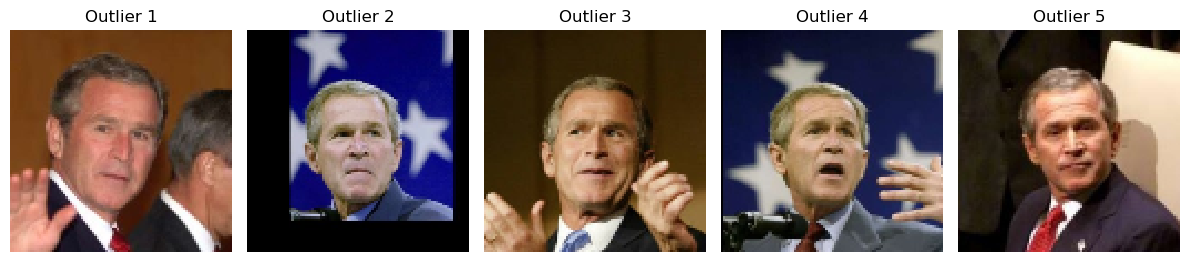

In [24]:
# Function to detect outliers based on image statistics (mean and std deviation)
def detect_outliers(images, threshold_mean, threshold_stddev):
    outlier_indices = []

    for i, img in enumerate(images):
        mean_pixel_value = np.mean(img)
        stddev_pixel_value = np.std(img)

        if mean_pixel_value > threshold_mean or stddev_pixel_value > threshold_stddev:
            outlier_indices.append(i)
    
    return outlier_indices

# Load images from the dataset folder
image_data, class_labels = load_images_from_subfolders(dataset_folder)

# Set thresholds for mean and standard deviation to identify outliers
threshold_mean = 150  # Adjust this threshold as needed
threshold_stddev = 60  # Adjust this threshold as needed

# Detect outliers
outlier_indices = detect_outliers(image_data, threshold_mean, threshold_stddev)

# Display outlier images
plt.figure(figsize=(12, 6))
for i, idx in enumerate(outlier_indices[:5]):  # Display the first 5 outliers as an example
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(image_data[idx], cv2.COLOR_BGR2RGB))
    plt.title(f'Outlier {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

/home/dosisiddhesh/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


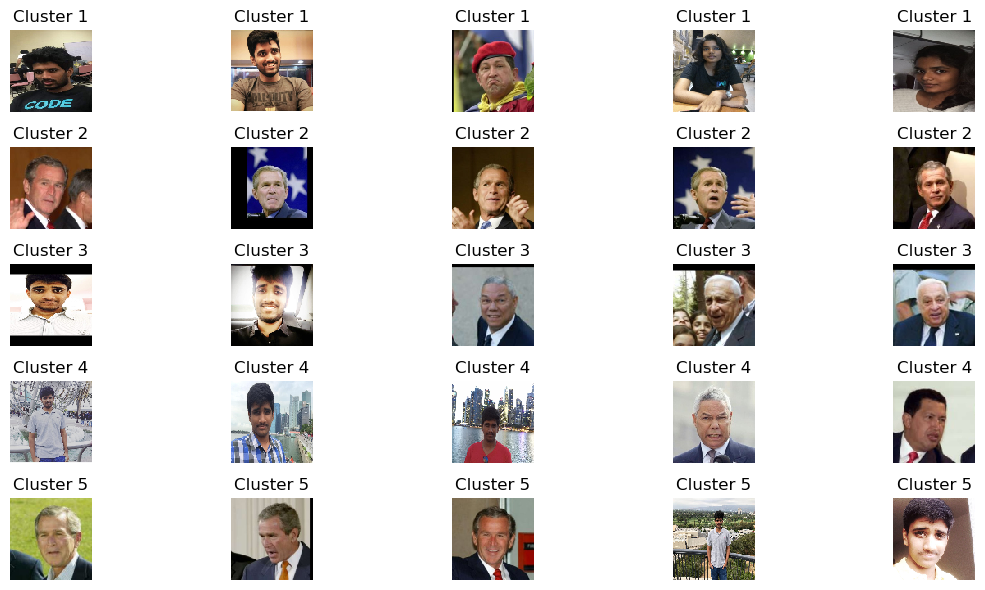

In [25]:
# Function to flatten image data for clustering
def flatten_image_data(images):
    return np.array([img.flatten() for img in images])

# Load images from the dataset folder
image_data, class_labels = load_images_from_subfolders(dataset_folder)

# Flatten image data for clustering
flattened_data = flatten_image_data(image_data)

# Perform K-Means clustering
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(flattened_data)

# Visualize the clustered images
plt.figure(figsize=(12, 6))
for i in range(num_clusters):
    cluster_images = [image_data[j] for j, label in enumerate(cluster_labels) if label == i]
    num_cluster_samples = min(len(cluster_images), 5)  # Display the first 5 images in each cluster
    for j in range(num_cluster_samples):
        plt.subplot(num_clusters, num_cluster_samples, i * num_cluster_samples + j + 1)
        plt.imshow(cv2.cvtColor(cluster_images[j], cv2.COLOR_BGR2RGB))
        plt.title(f'Cluster {i+1}')
        plt.axis('off')

plt.tight_layout()
plt.show()